In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def approx_ln(x, n):
    """
    Approximation of natural logatithm. 
    Method is based on arithmetic and geometric mean iteration.
    
    ln(x) is approximately (x-1)/a_n
    
    Where a_n = (a_{n-1}+g_{n-1})/2, g_n = sqrt(a_n * g_{n-1}), a_0 = (x+1)/2, g_0 = sqrt(x)
    
    :param x: Point of function approximation.
    :param n: Number of iterations.
    :return: Approximate ln(x)
    """  
    a = _approx_ln(x, n)[-1]

    return (x - 1)/a


def _approx_ln(x, n):
    """
    Helper function to the approx_ln function which does the arithmetic mean and geometric mean
    iterations. (Helper function is used for the ability of later reuse, see fast_approx_ln)
    
    :param x: Point of function approximation.
    :param n: Number of iterations.
    :return a: List of values {a_i}_0^{n-1} 
    """
    a = np.zeros(n+1)
    a[0] = (x + 1)/2
    g = np.sqrt(x)

    for i in range(n):
        a[i+1] = (a[i] + g)/2
        g = np.sqrt(a[i+1]*g)

    return a


def plot_ln(iterations, interval, num_points=1000):
    """
    Plots the true logarithm together with the approximated algorithm in one subplot 
    together with the difference in a seperate subplot (true - approximated).
    
    :param iterations: Number of iterations for the approximative logarithm algorithm.
    :param interval: Interval for the logarithm to be approximated on.
    :(optional) param num_points (default = 1000): Number of evaluation points over the interval.
    """
    x = np.linspace(interval[0], interval[1], num_points)
    approx_y = [approx_ln(_x, iterations) for _x in x]
    y = np.log(x)
    fig, axs = plt.subplots(2, 1)
    axs[0].plot(x, approx_y)
    axs[0].plot(x, y)
    axs[1].plot(x, y - approx_y)
    axs[0].legend(['Approx', 'True'])

    axs[0].set_xlabel('x')
    axs[0].set_ylabel('y')
    
    axs[1].set_xlabel('x')
    axs[1].set_ylabel('y - $\hat{y}$')
    axs[1].legend(['Difference'])
    
    axs[0].set_title('Logarithm')

    plt.show()

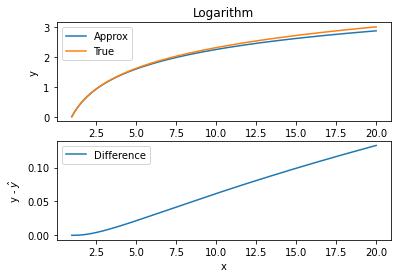

In [8]:
# Test, approx is indistinguishable from the true after about 4-5 iterations on this interval.
plot_ln(2, (1, 20), 1000)

Text(0.5, 0, 'Iterations')

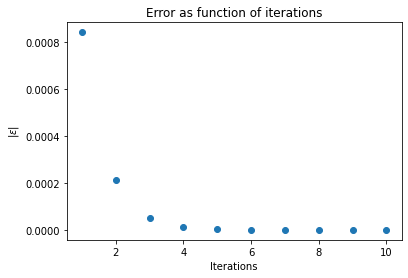

In [9]:
# Plot the error as a function of the iterations at x = 1.41.

maxiter = 10
x = 1.41 
y = np.log(x)
n = list(range(1, maxiter + 1))
error = [np.abs(y - approx_ln(x, iterations)) for iterations in n]

plt.scatter(n, error)
plt.title('Error as function of iterations')
plt.ylabel('$|\epsilon|$')
plt.xlabel('Iterations')

In [5]:
def fast_approx_ln(x, n):
    """
    Approximation of natural logatithm. 
    fast_approx_ln is an accelerated version of the approx_ln function.
    The same arithmetic and geometric mean iteration is used to get list a = {a_i}_i=0^{n-1}
    
    Let d_{k, i} = (d_{k-1, i} - 4^{-k} * d_{k-1, i-1})/(1 - 4^{-k}), d_{0, i} = a_i.
    
    Then: ln(x) is approximately (x-1)/d_{n, n}
    
    :param x: Point of function approximation.
    :param n: Number of iterations.
    :return: Approximate ln(x)
    """ 
    d = _fast_approx_ln(x, n)[-1, -1]

    return (x - 1)/d


def _fast_approx_ln(x, n):
    """
    Helper function to the fast_approx_ln function which constructs the "d-matrix" (see fast_approx_ln).
    
    :param x: Point of function approximation.
    :param n: Number of iterations.
    :return d: Upper triangle matrix with approximate logarithms after n iterations along the diagonal.
                e.g. d[5, 5] = approximate logarithm after 5 iterations.
    """
    d = np.zeros((n+1, n+1))
    d[0, :] = _approx_ln(x, n)

    for k in range(1, n+1):
        for i in range(k, n+1):
            d[k, i] = (d[k-1, i] - (4**-k) * d[k-1, i-1])/(1 - 4**-k)
            
    return d


def plot_fast_ln(iterations_list, interval, num_points=1000):
    """
    Plots the true logarithm together with the approximated algorithm in one subplot 
    together with the difference in a seperate subplot (true - approximated).
    
    :param iteration_list: List of number of iterations for the approximate logarithm algorithm.
    :param interval: Interval for the logarithm to be approximated on.
    :(optional) param num_points (default = 1000): Number of evaluation points over the interval.
    """
    x = np.linspace(interval[0], interval[1], num_points)
    y = np.log(x)
    errs = [np.abs(y - [fast_approx_ln(_x, iterations) for _x in x]) for iterations in iterations_list]
            
    fig, ax = plt.subplots(1, 1)
    
    for err in errs:
        ax.plot(x, err)
        
    ax.legend(labels=iterations_list)
    ax.set_yscale('log')
    ax.set_ylim([1e-17, 1e-2])

    plt.show()

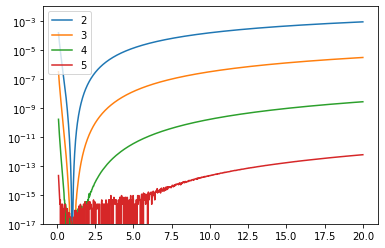

In [6]:
# Plot the result
plot_fast_ln([2, 3, 4, 5], [0.1, 20], 1000)